## MLAIF: Predicting Company Credit Rating


Submit report includes:
1. Present the detailed steps of the exercise (1 points)
2. Discuss why the final model is proper for analyzing this dataset (2 points)
3. Evaluate the performance of the model (1 points)
4. Code (2 points)

### Step 1. Load dataset and Data Munging

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

%matplotlib inline

In [2]:
# Load the dataset
os.chdir('~/Downloads/MSBA/MFIN 7034 MLAIF/HW/HW2')

rawdata = pd.read_excel('MFIN7034_A2_dataset.xlsx')
rawdata.head()

,GVKEY,DPR,PEG_TRAILING,BM,CAPEI,DIVYIELD,EVM,PCF,PE_EXI,PE_INC,...,ADV_SALE,STAFF_SALE,PEG_1YRFORWARD,PEG_LTGFORWARD,fyear,ratescore,ratescore_1,rating_1,increase,decrease
0,1004,0.224977,0.454208,0.685877,22.787483,0.016142,7.646158,20.263565,14.135906,14.135906,...,0.0,0.0,0.872955,0.956421,1999,NaN,NaN,NaN,NaN,NaN
1,1004,0.262151,0.681449,1.061121,10.676443,0.028333,6.509113,32.191424,9.375000,9.375000,...,0.0,0.0,1.289295,0.639495,2000,NaN,NaN,NaN,NaN,NaN
2,1004,0.494145,NaN,1.048147,14.440939,0.020581,8.867230,9.652586,23.942029,23.942029,...,0.0,0.0,0.610278,1.686058,2001,NaN,NaN,NaN,NaN,NaN
3,1004,NaN,NaN,0.934840,16.283756,0.011442,22.965296,-7.046567,-4.201923,-4.201923,...,0.0,0.0,-0.023237,-0.284876,2002,NaN,NaN,NaN,NaN,NaN
4,1004,NaN,NaN,2.215796,53.711070,NaN,13.018166,7.427663,-20.769231,-20.769231,...,0.0,0.0,-0.124578,NaN,2003,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check dataframe
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77182 entries, 0 to 77181
Data columns (total 78 columns):
GVKEY              77182 non-null int64
DPR                49923 non-null float64
PEG_TRAILING       34356 non-null float64
BM                 73146 non-null float64
CAPEI              70040 non-null float64
DIVYIELD           25358 non-null float64
EVM                76827 non-null float64
PCF                76448 non-null float64
PE_EXI             75998 non-null float64
PE_INC             76005 non-null float64
PE_OP_BASIC        75990 non-null float64
PE_OP_DIL          75990 non-null float64
PS                 75733 non-null float64
PTB                73146 non-null float64
EFFTAX             50498 non-null float64
GPROF              77059 non-null float64
AFTRET_EQ          76383 non-null float64
AFTRET_EQUITY      76406 non-null float64
AFTRET_INVCAPX     74826 non-null float64
GPM                75696 non-null float64
NPM                75733 non-null float64
OPMAD      

In [4]:
# Split labeled set and unlabeled set
label_raw = rawdata[rawdata['ratescore_1'] > 0]
unlabel_raw = rawdata[rawdata["ratescore_1"].isnull()]
label_raw

,GVKEY,DPR,PEG_TRAILING,BM,CAPEI,DIVYIELD,EVM,PCF,PE_EXI,PE_INC,...,ADV_SALE,STAFF_SALE,PEG_1YRFORWARD,PEG_LTGFORWARD,fyear,ratescore,ratescore_1,rating_1,increase,decrease
46,1045,NaN,NaN,2.031921,10.264716,NaN,-30.813630,7.890372,-2.283465,-2.283465,...,0.010652,0.423562,-0.041530,-0.258603,2001,10.0,13.0,BB-,0.0,1.0
49,1045,NaN,NaN,NaN,-1.245002,NaN,13.886677,1.908308,-1.791139,-1.791139,...,0.007831,0.360365,-0.075012,-0.137780,2004,11.0,10.0,B-,1.0,0.0
51,1045,0.000000,NaN,NaN,-7.949880,NaN,9.069838,4.216429,34.775510,34.775510,...,0.006825,0.301955,0.150564,2.398311,2006,10.0,11.0,B,0.0,1.0
54,1045,NaN,NaN,NaN,-4.170166,NaN,54.458716,3.286808,-1.841683,-1.841683,...,0.007682,0.341768,-0.019380,NaN,2009,4.0,10.0,B-,0.0,1.0
111,1075,0.697666,0.218934,1.091910,20.504439,0.044652,7.464421,4.564937,15.729097,15.220065,...,0.000000,0.000000,-2.849742,3.263298,2011,18.0,17.0,BBB+,1.0,0.0
142,1078,0.592127,1.469799,0.302069,18.218615,0.036590,8.724893,8.520931,16.250000,16.250000,...,0.000000,0.000000,1.613393,1.749193,2010,20.0,22.0,AA,0.0,1.0
267,1161,0.000000,0.115963,0.361032,-59.214699,NaN,7.802754,5.895272,69.800000,69.800000,...,0.044987,0.000000,-13.262000,4.891381,2004,12.0,11.0,B,1.0,0.0
268,1161,0.000000,NaN,0.258454,-67.306160,NaN,10.178878,12.540631,96.675000,96.675000,...,0.056947,0.000000,0.758715,5.781998,2005,11.0,12.0,B+,0.0,1.0
270,1161,NaN,-0.002292,0.659186,-6.127188,NaN,107.223404,-14.084037,-1.189769,-1.189769,...,0.092300,0.000000,-0.019643,-0.086529,2007,10.0,11.0,B,0.0,1.0
271,1161,NaN,-0.001123,NaN,-1.163573,NaN,25.719373,-1.917663,-0.547739,-0.427451,...,0.089532,0.000000,-0.026904,-0.043819,2008,12.0,10.0,B-,1.0,0.0


In [5]:
# Further clean the data
# Show the NA value within each column
label_raw.shape[0] - label_raw.count()

GVKEY                0
DPR                346
PEG_TRAILING       648
BM                  96
CAPEI               42
DIVYIELD           626
EVM                  2
PCF                  4
PE_EXI               5
PE_INC               5
PE_OP_BASIC          4
PE_OP_DIL            5
PS                   2
PTB                 96
EFFTAX             317
GPROF                0
AFTRET_EQ            5
AFTRET_EQUITY        4
AFTRET_INVCAPX      28
GPM                  2
NPM                  2
OPMAD                2
OPMBD                2
PRETRET_EARNAT     203
PRETRET_NOA        203
PTPM                 2
ROA                  4
ROCE                10
ROE                124
CAPITAL_RATIO        2
                  ... 
LT_PPENT            19
DE_RATIO             1
DEBT_ASSETS          0
DEBT_AT              1
DEBT_CAPITAL        30
INTCOV              76
INTCOV_RATIO        76
CASH_CONVERSION    305
CASH_RATIO         193
CURR_RATIO         193
QUICK_RATIO        193
AT_TURN              6
INV_TURN   

In [6]:
# Define a function that remove column with NA > threshold
def drop_col(df, thres):
    na = df.shape[0] - df.count()
    new_df = df.dropna(axis=1,thresh=thres)
    new_na = new_df.shape[0] - new_df.count()
    
    new_df = new_df.fillna(0)
    print("The NA value of new dataset is:\n", new_na)
    print("The shape of new dataset is:\n", new_df.shape)       
    return new_df

label_data = drop_col(label_raw, 1200)
unlabel_data = drop_col(unlabel_raw, 70000)

The NA value of new dataset is:
 GVKEY              0
CAPEI             42
EVM                2
PCF                4
PE_EXI             5
PE_INC             5
PE_OP_BASIC        4
PE_OP_DIL          5
PS                 2
GPROF              0
AFTRET_EQ          5
AFTRET_EQUITY      4
AFTRET_INVCAPX    28
GPM                2
NPM                2
OPMAD              2
OPMBD              2
PTPM               2
ROA                4
ROCE              10
CAPITAL_RATIO      2
EQUITY_INVCAP     10
DEBT_INVCAP       10
TOTDEBT_INVCAP    10
CASH_DEBT          4
CASH_LT            0
CFM                6
SHORT_DEBT         6
DEBT_EBITDA        3
LT_DEBT            1
LT_PPENT          19
DE_RATIO           1
DEBT_ASSETS        0
DEBT_AT            1
DEBT_CAPITAL      30
AT_TURN            6
PAY_TURN          53
RECT_TURN         25
SALE_INVCAP       11
ACCRUAL            4
RD_SALE            0
ADV_SALE           2
STAFF_SALE         2
fyear              0
ratescore          0
ratescore_1        0
r

In [8]:
print("The data is clean now!")
label_data # Have a look at clean data

The data is clean now!


,GVKEY,CAPEI,EVM,PCF,PE_EXI,PE_INC,PE_OP_BASIC,PE_OP_DIL,PS,GPROF,...,ACCRUAL,RD_SALE,ADV_SALE,STAFF_SALE,fyear,ratescore,ratescore_1,rating_1,increase,decrease
46,1045,10.264716,-30.813630,7.890372,-2.283465,-2.283465,-2.858708,-2.858708,0.212624,-0.013885,...,0.076980,0.000000,0.010652,0.423562,2001,10.0,13.0,BB-,0.0,1.0
49,1045,-1.245002,13.886677,1.908308,-1.791139,-1.791139,-1.524237,-1.524237,0.080263,0.122511,...,0.050875,0.000000,0.007831,0.360365,2004,11.0,10.0,B-,1.0,0.0
51,1045,-7.949880,9.069838,4.216429,34.775510,34.775510,21.037037,25.058824,0.362348,0.168262,...,0.058254,0.000000,0.006825,0.301955,2006,10.0,11.0,B,0.0,1.0
54,1045,-4.170166,54.458716,3.286808,-1.841683,-1.841683,-2.083900,-2.083900,0.153474,0.117226,...,0.094758,0.000000,0.007682,0.341768,2009,4.0,10.0,B-,0.0,1.0
111,1075,20.504439,7.464421,4.564937,15.729097,15.220065,15.624585,15.729097,1.585194,0.089510,...,0.062607,0.000000,0.000000,0.000000,2011,18.0,17.0,BBB+,1.0,0.0
142,1078,18.218615,8.724893,8.520931,16.250000,16.250000,11.452381,11.534772,2.116737,0.399982,...,0.073469,0.114814,0.000000,0.000000,2010,20.0,22.0,AA,0.0,1.0
267,1161,-59.214699,7.802754,5.895272,69.800000,69.800000,49.857143,51.323529,1.280700,0.407065,...,0.133261,0.186861,0.044987,0.000000,2004,12.0,11.0,B,1.0,0.0
268,1161,-67.306160,10.178878,12.540631,96.675000,96.675000,56.867647,58.590909,3.180110,0.495502,...,0.174117,0.195641,0.056947,0.000000,2005,11.0,12.0,B+,0.0,1.0
270,1161,-6.127188,107.223404,-14.084037,-1.189769,-1.189769,-2.310897,-2.310897,0.726102,0.285368,...,0.248532,0.307168,0.092300,0.000000,2007,10.0,11.0,B,0.0,1.0
271,1161,-1.163573,25.719373,-1.917663,-0.547739,-0.427451,-0.900826,-0.900826,0.228482,0.443909,...,0.179142,0.318182,0.089532,0.000000,2008,12.0,10.0,B-,1.0,0.0


### Step 2. Exploratory Data Analysis
** The distribution of data influences training and predicting result, and that is why we have to check it. <br>
It seems that most credit ratings concentrate on B level, and most companies tend to decrease over a year. **

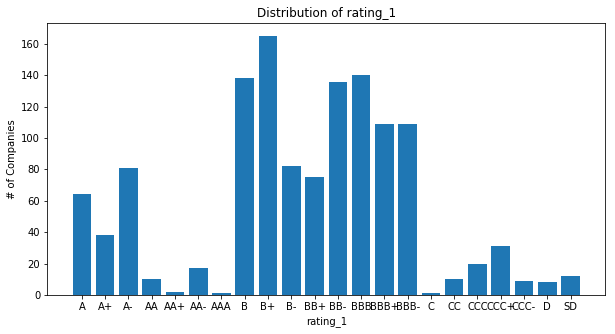

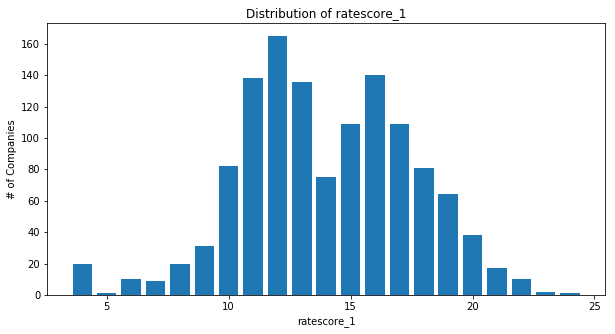

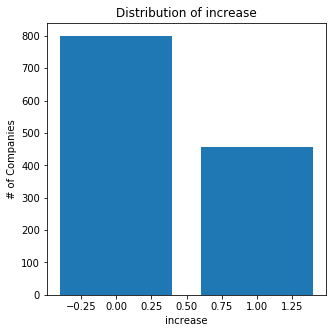

In [9]:
# Check the distribution of dependent variables in labeled set
def histo(var, length, width):
    from collections import Counter
    c = Counter(label_data[var])
    plt.figure(figsize=(length, width))
    plt.xlabel(var) 
    plt.ylabel("# of Companies") 
    plt.title("Distribution of "+var) 
    plt.bar(c.keys(),        
            c.values()) 

    plt.show()
    
# rating_1 (Credit)
histo('rating_1', 10, 5)
# ratescore_1
histo('ratescore_1', 10, 5)
# Increase (Opposite of Decrease)
histo('increase', 5, 5)

** Still too many variables, so I decide to perform PCA to find the principle components.**
    

In [11]:
# PCA: The first principle component explains 99.56% variations.
# Many variables here are unimportant and thus we can do feature engineering.
x_train = label_data.loc[:,:'ratescore']
from sklearn.decomposition import PCA
estimator = PCA(n_components=1) 
pca_xtrain = estimator.fit_transform(x_train)

print(estimator.explained_variance_ratio_)
print(estimator.explained_variance_)
print(estimator.n_components)

[ 0.99562167]
[  2.91759507e+09]
1


### Step3. Feature engineering & Machine learning
#### 1) Regression: Regularization (LASSO, Ridge and ElasticNet)

In [12]:
# Split into training set and testing set
from sklearn.cross_validation import train_test_split
X = label_data.loc[:,:'ratescore']
y = label_data['ratescore_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=0)

print('The shape of training set is:\n', X_train.shape)

The shape of training set is:
 (1031, 45)


/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
# Lasso
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.001]).fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_) # return all the parameters 
alpha = model_lasso.alpha_
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
print("The best learning rate is ", alpha)

Lasso picked 16 variables and eliminated the other 29 variables.
The best learning rate is  0.1


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The most important variable is: ratescore


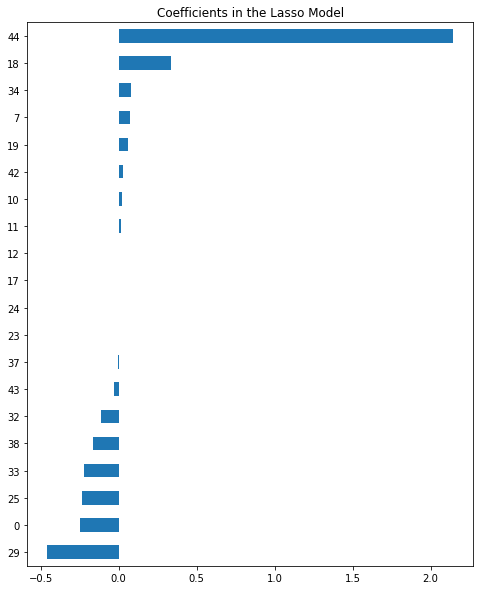

In [15]:
# Check coefficients: The most important variable is the 44th one.
imp_coef = pd.concat([coef.sort_values().head(10), 
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

print('The most important variable is:', X.columns[44])

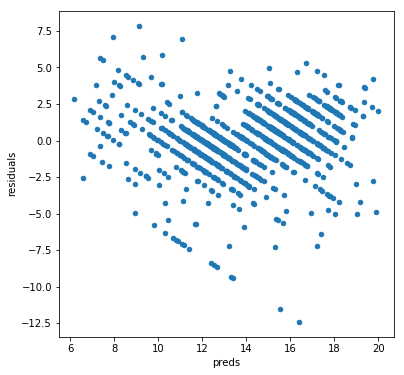

In [16]:
# Check residuals: generally speaking, the residuals evenly distribute on both sides of x-axis, but it reveals some pattern.
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [17]:
# Check R-squared
from sklearn.metrics import r2_score

y_pred_lasso=model_lasso.predict(X_test)
r2_score_lasso=r2_score(y_test,y_pred_lasso)
print('r^2 on test data:%f' %r2_score_lasso)

r^2 on test data:0.605030


In [18]:
# Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = alpha).fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
print('r^2 on test data:%f' %r2_score_ridge)

r^2 on test data:0.563733


In [19]:
# ElasticNet
from sklearn.linear_model import ElasticNet
model_enet=ElasticNet(alpha=alpha,l1_ratio=0.7).fit(X_train,y_train)
y_pred_enet=model_enet.predict(X_test)
r2_score_enet=r2_score(y_test,y_pred_enet)
print('r^2 on test data:%f' %r2_score_enet)

r^2 on test data:0.597795


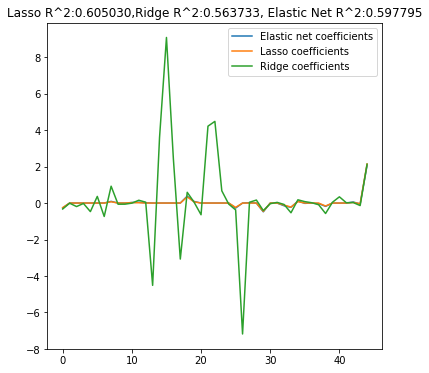

In [20]:
# Plot the 3 models
plt.plot(model_enet.coef_,label='Elastic net coefficients')
plt.plot(model_lasso.coef_,label='Lasso coefficients')
plt.plot(model_ridge.coef_,label='Ridge coefficients' )
plt.legend(loc='best')
plt.title('Lasso R^2:%f,Ridge R^2:%f, Elastic Net R^2:%f' %(r2_score_lasso,r2_score_ridge,r2_score_enet))
plt.show()

** Therefore, LASSO is the best model here in terms of linear model, with 0.61 R^2.** <br>
LASSO coefficients are shown below.

In [21]:
model_lasso.coef_

array([ -2.48246103e-01,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   7.02982857e-02,   0.00000000e+00,
        -0.00000000e+00,   2.44977483e-02,   1.64124495e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.37625429e-01,   6.27717458e-02,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -2.36933830e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.57929855e-01,
        -0.00000000e+00,   0.00000000e+00,  -1.12064528e-01,
        -2.20827391e-01,   7.87092300e-02,  -0.00000000e+00,
        -0.00000000e+00,  -1.87963480e-03,  -1.61570522e-01,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         3.01798790e-02,  -3.24437943e-02,   2.14349484e+00])

#### 2) Classification: Logistic Regression, LDA and Naive Bayes
Use "Increase" as the dependent variable, since "decrease" is just the opposite.

In [22]:
# Split into training set and testing set
from sklearn.cross_validation import train_test_split
X = label_data.loc[:,'CAPEI':'ratescore']
y = label_data['increase'] # Dummy variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=0)

print('The shape of training set is:\n', X_train.shape)

The shape of training set is:
 (1031, 44)


In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

In [24]:
# Create confusion matrix and Accuracy rate
from sklearn.metrics import confusion_matrix
def classification_result(X_test, y_test, pred, model):
    score = model.score(X_test, y_test)
    cm = confusion_matrix(y_test, pred)
    print(cm) 
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    
    print('The average accuracy is:', score)

In [25]:
# Logistic
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1, penalty = 'l2').fit(X_train, y_train) # C:regularization lambda, defalut penalty = l2
y_pred_lr = model_lr.predict(X_test)

classification_result(X_test, y_test, y_pred_lr, model_lr)

[[  0 139]
 [  1  87]]
The average accuracy is: 0.383259911894


In [26]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

classification_result(X_test, y_test, y_pred_lda, model_lda)

[[  0 139]
 [  0  88]]
The average accuracy is: 0.387665198238


In [27]:
# Gaussian Naive Bayes: From the credit distribution, we consider it as Gaussian-distributed.
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

classification_result(X_test, y_test, y_pred_nb, model_nb)

[[123  16]
 [ 73  15]]
The average accuracy is: 0.607929515419


In [28]:
# Plot ROC(Receiver Operating Characteristic) and AUC

def get_roc_auc(X_train, X_test, y_train, y_test, model):

    from sklearn.metrics import roc_curve, roc_auc_score
    train_probs = model.predict_proba(X_train)[:,1]
    test_probs = model.predict_proba(X_test)[:,1]

    #AUC
    auc_train = roc_auc_score(y_train, train_probs)
    auc_test = roc_auc_score(y_test, test_probs)

    print('Auc_train: {}'.format(auc_train))
    print('Auc_test: {}'.format(auc_test))

    # ROC
    roc_train = roc_curve(y_train, train_probs)
    roc_test = roc_curve(y_test, test_probs)

    # Plot
    plt.plot(roc_train[0], roc_train[1])
    plt.plot(roc_test[0], roc_test[1])

Auc_train: 0.7652778345667907
Auc_test: 0.49787442773054286
Auc_train: 0.765739869975876
Auc_test: 0.5
Auc_train: 0.6274604407736026
Auc_test: 0.5276733158927404


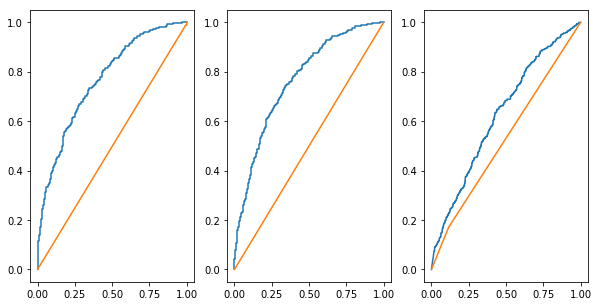

In [29]:
plt.figure(figsize=(10,5))
model = [model_lr, model_lda, model_nb]
for i in range(3):
    plt.subplot(1,3,i+1)
    get_roc_auc(X_train, X_test, y_train, y_test, model[i])

**As for classification algorithms, Naive Bayes achieved the highest accuracy rate with 0.6079. <br>
The ROC curve and AUC score indicate that Logistic regression and LDA performed well on training set, while Naive Bayes was better on testing set. <br>
Overall, Naive Bayes is chosen as the classifier of final model for classification problem. **

### Step 4. Conclusion

1. Present the detailed steps of the exercise (1 points)
> The general idea is:
>- Load and clean data; 
>- Obtain the labelled data and further split into training set and testing set; 
>- Explor data including distribution and correlation check; 
>- Apply machine learning algorithms while deal with overfitting carefully; 
>- Evaluate models' performance and choose a good model
2. Discuss why the final model is proper for analyzing this dataset (2 points)
> For regression problem, I chose LASSO; for classification problem, I chose Naive Bayes.<br>
>- **LASSO is proper because:**
>- In this case, I have 40+ variables after data munging. If I include all the variables in model, overfitting tends to appear. Compared with Ridge and ElasticNet, LASSO performs better when deals with overfitting, since it uses L1 norm and forces some variable to 0.
>- **Naive Bayes is proper because:**
>- NB has a solid mathematical foundation and stable classification efficiency. Besides, it requires few parameters to estimate and is less sensitive to missing data. In this case, I do have noises and missing data.
>- Guassian distribution maybe a reasonable assumption, while linear hypothesis may not hold for the other two algorithms. <br>
> **Overall, we consider LASSO as the final model.**
>- LASSO's performance is more stable than NB do.
>- A continuous dependent variable shows more preciser result than a dummy one. According to the predicted rating score, we can infer the credit level and movement trends naturally.

3. Evaluate the performance of the model (1 points)
>- Coefficients, Residuals and R squared are shown above for regression methods. LASSO's R squared: 0.6053
>- Accuracy rate, Confusion_matrix, ROC and AUC are shown above for classification methods. NB's accuray:0.6079

4. Code (2 points)
>- Please refer the Jupyter notebook.